In [1]:
"""
Code to make SWAN input requesting SPEC2D output for drifters

This notebook is based on the really nice example provided by Jacob Davis (davisjr@uw.edu)

Example code for loading and working with Spotter data from the NHCI
aggregated drifter dataset in Python .pickle format. Since all datasets
have the same variable names and structure, this example framework can
also be used for DWSD and microSWIFT drifters.

"""

import os
import pickle
from datetime import datetime, timezone

import matplotlib.pyplot as plt
import pandas as pd

DATA_DIRECTORY = '/vortexfs1/home/csherwood/proj/NOPP/buoy_data/'
SPOTTER_DATA_FILENAME = 'hurricane_ian_spotter_data_v1.pickle'

with open(os.path.join(DATA_DIRECTORY, SPOTTER_DATA_FILENAME), 'rb') as handle:
    spotter = pickle.load(handle)

# `spotter` is a python dictionary of Pandas DataFrames, keyed by
# each drifter ID. The drifter ids can then be accessed as follows:
spotter_ids = list(spotter.keys())

for id in spotter_ids:
    print(id)

SPOT-30068D
SPOT-30097D
SPOT-30096D
SPOT-30104D
SPOT-30024D
SPOT-30065D


In [2]:
# The data for a single id (e.g. the first) can be accessed as:
spotter_id = spotter_ids[0] # = 'SPOT-30068D'
spotter[spotter_id].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2022-09-27 00:15:55+00:00 to 2022-09-29 23:55:55+00:00
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   latitude                 216 non-null    float64
 1   longitude                216 non-null    float64
 2   significant_height       72 non-null     float64
 3   peak_period              72 non-null     float64
 4   peak_direction           72 non-null     float64
 5   peak_directional_spread  72 non-null     float64
 6   mean_period              72 non-null     float64
 7   mean_direction           72 non-null     float64
 8   mean_directional_spread  72 non-null     float64
 9   frequency                72 non-null     object 
 10  energy_density           72 non-null     object 
 11  a1                       72 non-null     object 
 12  b1                       72 non-null     object 
 13  a2                       72 non

In [9]:
MSWIFT_DATA_FILENAME = 'hurricane_ian_microswift_data_v1.pickle'

with open(os.path.join(DATA_DIRECTORY, MSWIFT_DATA_FILENAME), 'rb') as handle:
    mswift = pickle.load(handle)

# `spotter` is a python dictionary of Pandas DataFrames, keyed by
# each drifter ID. The drifter ids can then be accessed as follows:
mswift_ids = list(mswift.keys())

for id in mswift_ids:
    print(id)

019
057


In [11]:
# The data for a single id (e.g. the first) can be accessed as:
mswift_id = mswift_ids[0] 
mswift[mswift_id].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2022-09-26 18:42:07.999997440 to 2022-09-30 16:42:40.000001536
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   latitude                 90 non-null     float64
 1   longitude                90 non-null     float64
 2   significant_height       90 non-null     float64
 3   peak_period              90 non-null     float64
 4   peak_direction           90 non-null     float64
 5   peak_directional_spread  90 non-null     float64
 6   mean_period              90 non-null     float64
 7   mean_direction           90 non-null     float64
 8   mean_directional_spread  90 non-null     float64
 9   frequency                90 non-null     object 
 10  energy_density           90 non-null     object 
 11  a1                       90 non-null     object 
 12  b1                       90 non-null     object 
 13  a2                      

In [5]:
DWSD_DATA_FILENAME = 'hurricane_ian_dwsd_data_v1.pickle'

with open(os.path.join(DATA_DIRECTORY, DWSD_DATA_FILENAME), 'rb') as handle:
    dwsd = pickle.load(handle)

# `spotter` is a python dictionary of Pandas DataFrames, keyed by
# each drifter ID. The drifter ids can then be accessed as follows:
dwsd_ids = list(dwsd.keys())

for id in dwsd_ids:
    print(id)

300234068545130
300234068545140
300234068545200
300234068545220
300234068545420
300234068545430
300234068942810
300234068943230
300234068943240
300234068943560
300234068943590
300234068943600
300234068943610
300234068943670
300234068943710
300234068943720
300234068949560
300534060254280
300534060255020
300534060646740
300534060646780
300534060947380
300534060948080
300534060948410
300534061550970
300534061605930
300534061605940
300534061606960
300534061617480
300534061618130
300534061618410
300534061708520
300534061800920


In [12]:
# The data for a single id (e.g. the first) can be accessed as:
dwsd_id = dwsd_ids[0] 
dwsd[dwsd_id].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2022-09-23 00:00:00+00:00 to 2022-10-02 00:00:00+00:00
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   latitude                 330 non-null    float64
 1   longitude                330 non-null    float64
 2   significant_height       274 non-null    float64
 3   peak_period              274 non-null    float64
 4   peak_direction           274 non-null    float64
 5   peak_directional_spread  274 non-null    float64
 6   mean_period              274 non-null    float64
 7   mean_direction           274 non-null    float64
 8   mean_directional_spread  274 non-null    float64
 9   frequency                274 non-null    object 
 10  energy_density           274 non-null    object 
 11  a1                       274 non-null    object 
 12  b1                       274 non-null    object 
 13  a2                       274 no

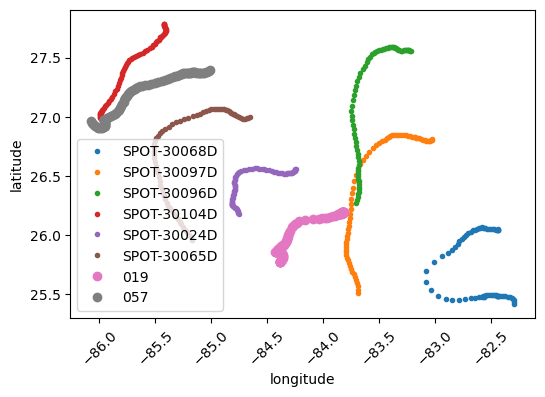

In [23]:
# example: plot lat, lon for positions with valid wave data
fig, ax = plt.subplots(figsize=(6,4))
for spotter_id in spotter.keys():
    only_waves = spotter[spotter_id]['energy_density'].notnull()
    ax.plot(
        spotter[spotter_id][only_waves]['longitude'],
        spotter[spotter_id][only_waves]['latitude'],'.',
        label = spotter_id,
    )
for mswift_id in mswift.keys():
    only_waves = mswift[mswift_id]['energy_density'].notnull()
    ax.plot(
        mswift[mswift_id][only_waves]['longitude'],
        mswift[mswift_id][only_waves]['latitude'],'o',
        label = mswift_id,
    )
# for dwsd_id in dwsd.keys():
#     only_waves = dwsd[dwsd_id]['energy_density'].notnull()
#     ax.plot(
#         dwsd[dwsd_id][only_waves]['longitude'],
#         dwsd[dwsd_id][only_waves]['latitude'],'+',
#         label = dwsd_id,
#     )
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
ax.legend()
ax.tick_params(axis='x', rotation=45)

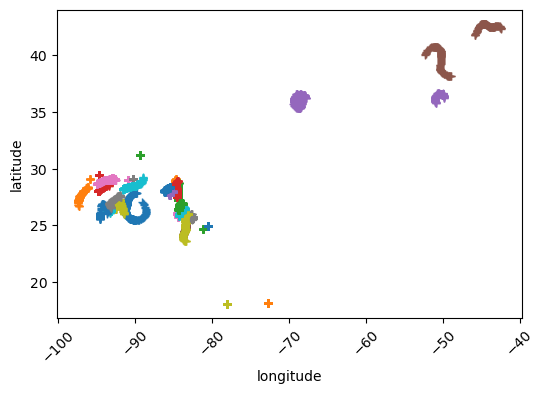

In [25]:
# example: plot lat, lon for positions with valid wave data
fig, ax = plt.subplots(figsize=(6,4))
# for spotter_id in spotter.keys():
#     only_waves = spotter[spotter_id]['energy_density'].notnull()
#     ax.plot(
#         spotter[spotter_id][only_waves]['longitude'],
#         spotter[spotter_id][only_waves]['latitude'],'.',
#         label = spotter_id,
#     )
# for mswift_id in mswift.keys():
#     only_waves = mswift[mswift_id]['energy_density'].notnull()
#     ax.plot(
#         mswift[mswift_id][only_waves]['longitude'],
#         mswift[mswift_id][only_waves]['latitude'],'o',
#         label = mswift_id,
#     )
for dwsd_id in dwsd.keys():
    only_waves = dwsd[dwsd_id]['energy_density'].notnull()
    ax.plot(
        dwsd[dwsd_id][only_waves]['longitude'],
        dwsd[dwsd_id][only_waves]['latitude'],'+',
        label = dwsd_id,
    )
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
#ax.legend()
ax.tick_params(axis='x', rotation=45)

In [7]:
# Open a file text to be cut+pasted into SWAN input file for spotters
f = open('spotter_spec2d.txt', 'w')
for spotter_id in spotter.keys():
    # Some rows have times with other data but no wave info
    only_waves = spotter[spotter_id]['energy_density'].notnull()
    spotter[spotter_id][only_waves]
    ipt = 0 # index must stay below 100 or file names will be too long
    for index, row in spotter[spotter_id][only_waves].iterrows():
        #print(index, row['latitude'])
        pname = "{}{:02d}".format(spotter_id[5:], ipt)
        starttime = index.strftime('%Y%m%d.%H%m')
        pline = ("POINTS '{}' {:.4f} {:.4f}".format(pname, row['longitude'], row['latitude'] )) 
        sline = "SPECOUT '{}' SPEC2D ABS '{}.spc2d' OUTPUT {} 1000 HR".format( pname, pname, starttime )
        # print(pline)
        # print(sline)
        f.write(pline+'\n')
        f.write(sline+'\n')
        ipt +=1
        if(ipt >= 100):
            print("Warning: SWAN output filename prefix exceeds 8 chars.")
    
f.close()

In [13]:
# Open a file text to be cut+pasted into SWAN input file for Microswifts
f1 = open('mswift_spec2d.txt', 'w')
for mswift_id in mswift.keys():
    # Some rows have times with other data but no wave info
    only_waves = mswift[mswift_id]['energy_density'].notnull()
    ipt = 0 # index must stay below 100 or file names will be too long
    for index, row in mswift[mswift_id][only_waves].iterrows():
        #print(index, row['latitude'])
        pname = "ms{}{:02d}".format(mswift_id, ipt)
        starttime = index.strftime('%Y%m%d.%H%m')
        pline = ("POINTS '{}' {:.4f} {:.4f}".format(pname, row['longitude'], row['latitude'] )) 
        sline = "SPECOUT '{}' SPEC2D ABS '{}.spc2d' OUTPUT {} 1000 HR".format( pname, pname, starttime )
        # print(pline)
        # print(sline)
        f1.write(pline+'\n')
        f1.write(sline+'\n')
        ipt +=1
        if(ipt >= 100):
            print("Warning: SWAN output filename prefix exceeds 8 chars.")
    
f1.close()

In [17]:
# Open a file text to be cut+pasted into SWAN input file for dwsd drifters
# These have ids that are too long, so make a shorter name for SWAN
f2 = open('dwsd_spec2d.txt', 'w')
f3 = open('dwsd_key.txt', 'w') # key for names
for k, dwsd_id in enumerate( dwsd.keys() ):
    # make a new name for this drifter
    kname = "dw{:03d}".format(k)
    #print(kname)
    # write that to a file for future use
    kline = "{},{}".format(dwsd_id, kname)
    f3.write(kline+'\n')
    # Some rows have times with other data but no wave info
    only_waves = dwsd[dwsd_id]['energy_density'].notnull()
    ipt = 0 # index must stay below 1000 or file names will be too long
    for index, row in dwsd[dwsd_id][only_waves].iterrows():
        pname = "{}{:03d}".format(kname, ipt)
        starttime = index.strftime('%Y%m%d.%H%m')
        pline = ("POINTS '{}' {:.4f} {:.4f}".format(pname, row['longitude'], row['latitude'] )) 
        sline = "SPECOUT '{}' SPEC2D ABS '{}.spc2d' OUTPUT {} 1000 HR".format( pname, pname, starttime )
        # print(pline)
        # print(sline)
        f2.write(pline+'\n')
        f2.write(sline+'\n')
        ipt +=1
        if(ipt >= 1000):
            print("Warning: SWAN output filename prefix exceeds 8 chars.")
    
f2.close()
f3.close()

dw000
dw001
dw002
dw003
dw004
dw005
dw006
dw007
dw008
dw009
dw010
dw011
dw012
dw013
dw014
dw015
dw016
dw017
dw018
dw019
dw020
dw021
dw022
dw023
dw024
dw025
dw026
dw027
dw028
dw029
dw030
dw031
dw032


In [ ]:
# Also, a file for the fixed buoys


Text(0.5, 1.0, 'SPOT-30065D significant wave height')

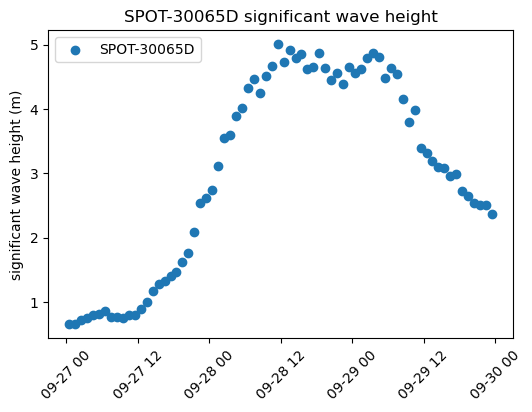

In [5]:
# Variables are queried using the column name:
spotter[spotter_id]['significant_height']

# The DataFrame is indexed by time. The array of datetimes can be
# accessed using the index property; this also enables slicing the
# dataset over two datetimes.
spotter[spotter_id].index # array of datetimes

start_date = datetime(2022,9,28, tzinfo=timezone.utc)
end_date = datetime(2022,9,29, tzinfo=timezone.utc)
spotter[spotter_id][start_date:end_date] # data from 2022-09-28 to 2022-09-29

# example: plot significant wave height over the entire dataset.
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(
    spotter[spotter_id].index,
    spotter[spotter_id]['significant_height'],
    label = spotter_id,
)
ax.set_ylabel('significant wave height (m)')
ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_title(f'{spotter_id} significant wave height')

Text(0.5, 1.0, 'SPOT-30065D significant wave height from \n 2022-09-28 00:00:00+00:00 to 2022-09-29 00:00:00+00:00')

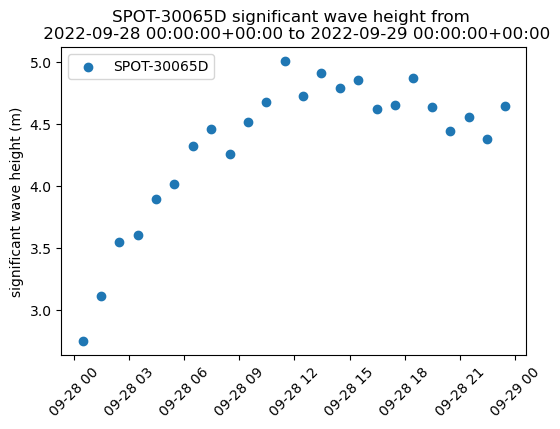

In [6]:
# example: plot significant wave height over the specified datetimes.
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(
    spotter[spotter_id][start_date:end_date].index,
    spotter[spotter_id][start_date:end_date]['significant_height'],
    label = spotter_id,
)
ax.set_ylabel('significant wave height (m)')
ax.legend()
ax.tick_params(axis='x', rotation=45)
ax.set_title(f'{spotter_id} significant wave height from \n {start_date} to {end_date}')

Text(0.5, 1.0, 'SPOT-30065D energy densities from \n 2022-09-28 00:00:00+00:00 to 2022-09-29 00:00:00+00:00')

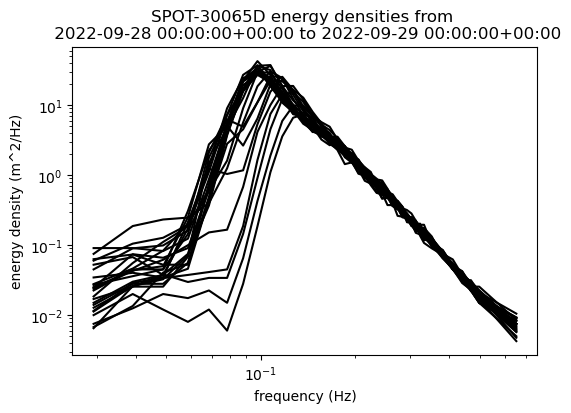

In [7]:
# example: plot energy as a function of frequency over the specified
# datetimes (a loop is the easiest way to do this)
fig, ax = plt.subplots(figsize=(6,4))
for E,f in zip(spotter[spotter_id][start_date:end_date]['energy_density'],
               spotter[spotter_id][start_date:end_date]['frequency']):
    ax.plot(f, E, color='k')

ax.set_ylabel('energy density (m^2/Hz)')
ax.set_xlabel('frequency (Hz)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title(f'{spotter_id} energy densities from \n {start_date} to {end_date}')

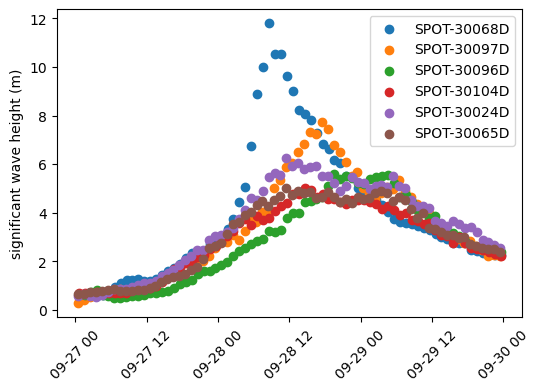

In [8]:
# Finally, the uniformity of the dataset enables multiple drifters (of
# different ID or type) to be operated on in a loop. For example, plot
# the significant wave height for every Spotter:
fig, ax = plt.subplots(figsize=(6,4))
for spotter_id in spotter.keys():
    ax.scatter(
        spotter[spotter_id].index,
        spotter[spotter_id]['significant_height'],
        label = spotter_id,
    )
ax.set_ylabel('significant wave height (m)')
ax.legend()
ax.tick_params(axis='x', rotation=45)

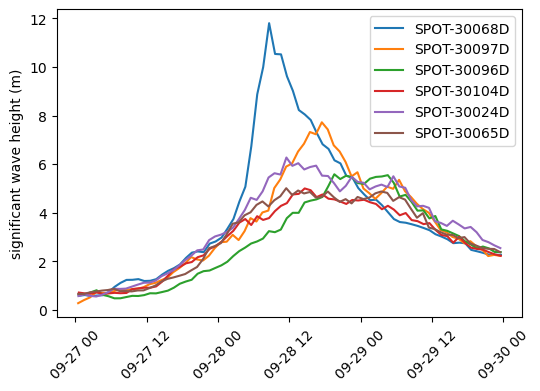

In [9]:
# Important note: some Spotter datasets contain barometer and 
# temperature measurements interspersed at a different time interval
# than the wave measurements. This means rows corresponding to times 
# where there are pressure and temperature measurements but not wave 
# measurements will contain NaNs for wave properties. This is rarely a 
# problem, except for when a lineplot or the extraction of all
# spectral data as a single matrix is desired. In these cases, the rows
# containing NaNs can be filtered out using the notnull() method (and
# the wave data can be assigned to a new variable, if neccessary).
only_waves = spotter[spotter_id]['energy_density'].notnull()
spotter[spotter_id][only_waves]

# example: plot significant wave height for every Spotter but this time
# as a lineplot (which cannot handle NaNs)
fig, ax = plt.subplots(figsize=(6,4))
for spotter_id in spotter.keys():
    only_waves = spotter[spotter_id]['energy_density'].notnull()
    ax.plot(
        spotter[spotter_id][only_waves].index,
        spotter[spotter_id][only_waves]['significant_height'],
        label = spotter_id,
    )
ax.set_ylabel('significant wave height (m)')
ax.legend()
ax.tick_params(axis='x', rotation=45)